In [1]:
import esm
import torch
import matplotlib.pyplot as plt


In [2]:
esm_transformer, esm2_alphabet = esm.pretrained.esm2_t36_3B_UR50D()
batch_converter = esm2_alphabet.get_batch_converter()


Downloading: "https://dl.fbaipublicfiles.com/fair-esm/models/esm2_t36_3B_UR50D.pt" to /Users/garyk/.cache/torch/hub/checkpoints/esm2_t36_3B_UR50D.pt
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/regression/esm2_t36_3B_UR50D-contact-regression.pt" to /Users/garyk/.cache/torch/hub/checkpoints/esm2_t36_3B_UR50D-contact-regression.pt


In [4]:
# Example

seq1 = 'MEPSLLSLFVLGVVALTETRAGSHSLRYFDTAMSRPELGDSQFISVGYVDDQQFVRFDSSSESPRMEPRAAWMDKVDQEDPNYWEGQTQISRSNAQITRVGLETIRGYYNQSRGGLHTYQTMIGCEVHPDGSFRKGFWQHAYDGHDYIALDRETLTWTAADPGAENTKRKWEAERSIAERYKAYLEEECVQWLKKYLQMGKDVLLRTEPSSARVSRHSGPDGEVSLRCRAQGFYPAEISLTWLRDGEEQLQDTEFIETRPGGDGTFQKWAAVAMAPGQEDRYSCRVQHEALAQPLSLRWEPEASSLWVIVGVTAGVLVLVTAVVAGAVILRRRNSGGKGGAYVPGAA'
seq = seq1 + 'GSGSGSGSGSGSGSGS'
seq_tuple = [(1, seq)]
batch_labels, batch_strs, batch_tokens = batch_converter(seq_tuple)

with torch.no_grad():
    outputs = esm_transformer(batch_tokens, gap_info_list = [], repr_layers=[36])
    
layer = outputs['representations'][36]

In [4]:
# # Changing the gap size

# def modify_gap (esm_model, distance):
#     esm_model.gap_distance = distance
#     for layer in esm_transformer.layers:
#         layer.gap_distance = distance
#         layer.self_attn.gap_distance = distance
#         layer.self_attn.rot_emb.gap_distance = distance
    
#     return esm_model


In [5]:
# Comparison of contacts. Note that the contact prediction is not retrained for working with the gap distance!!!

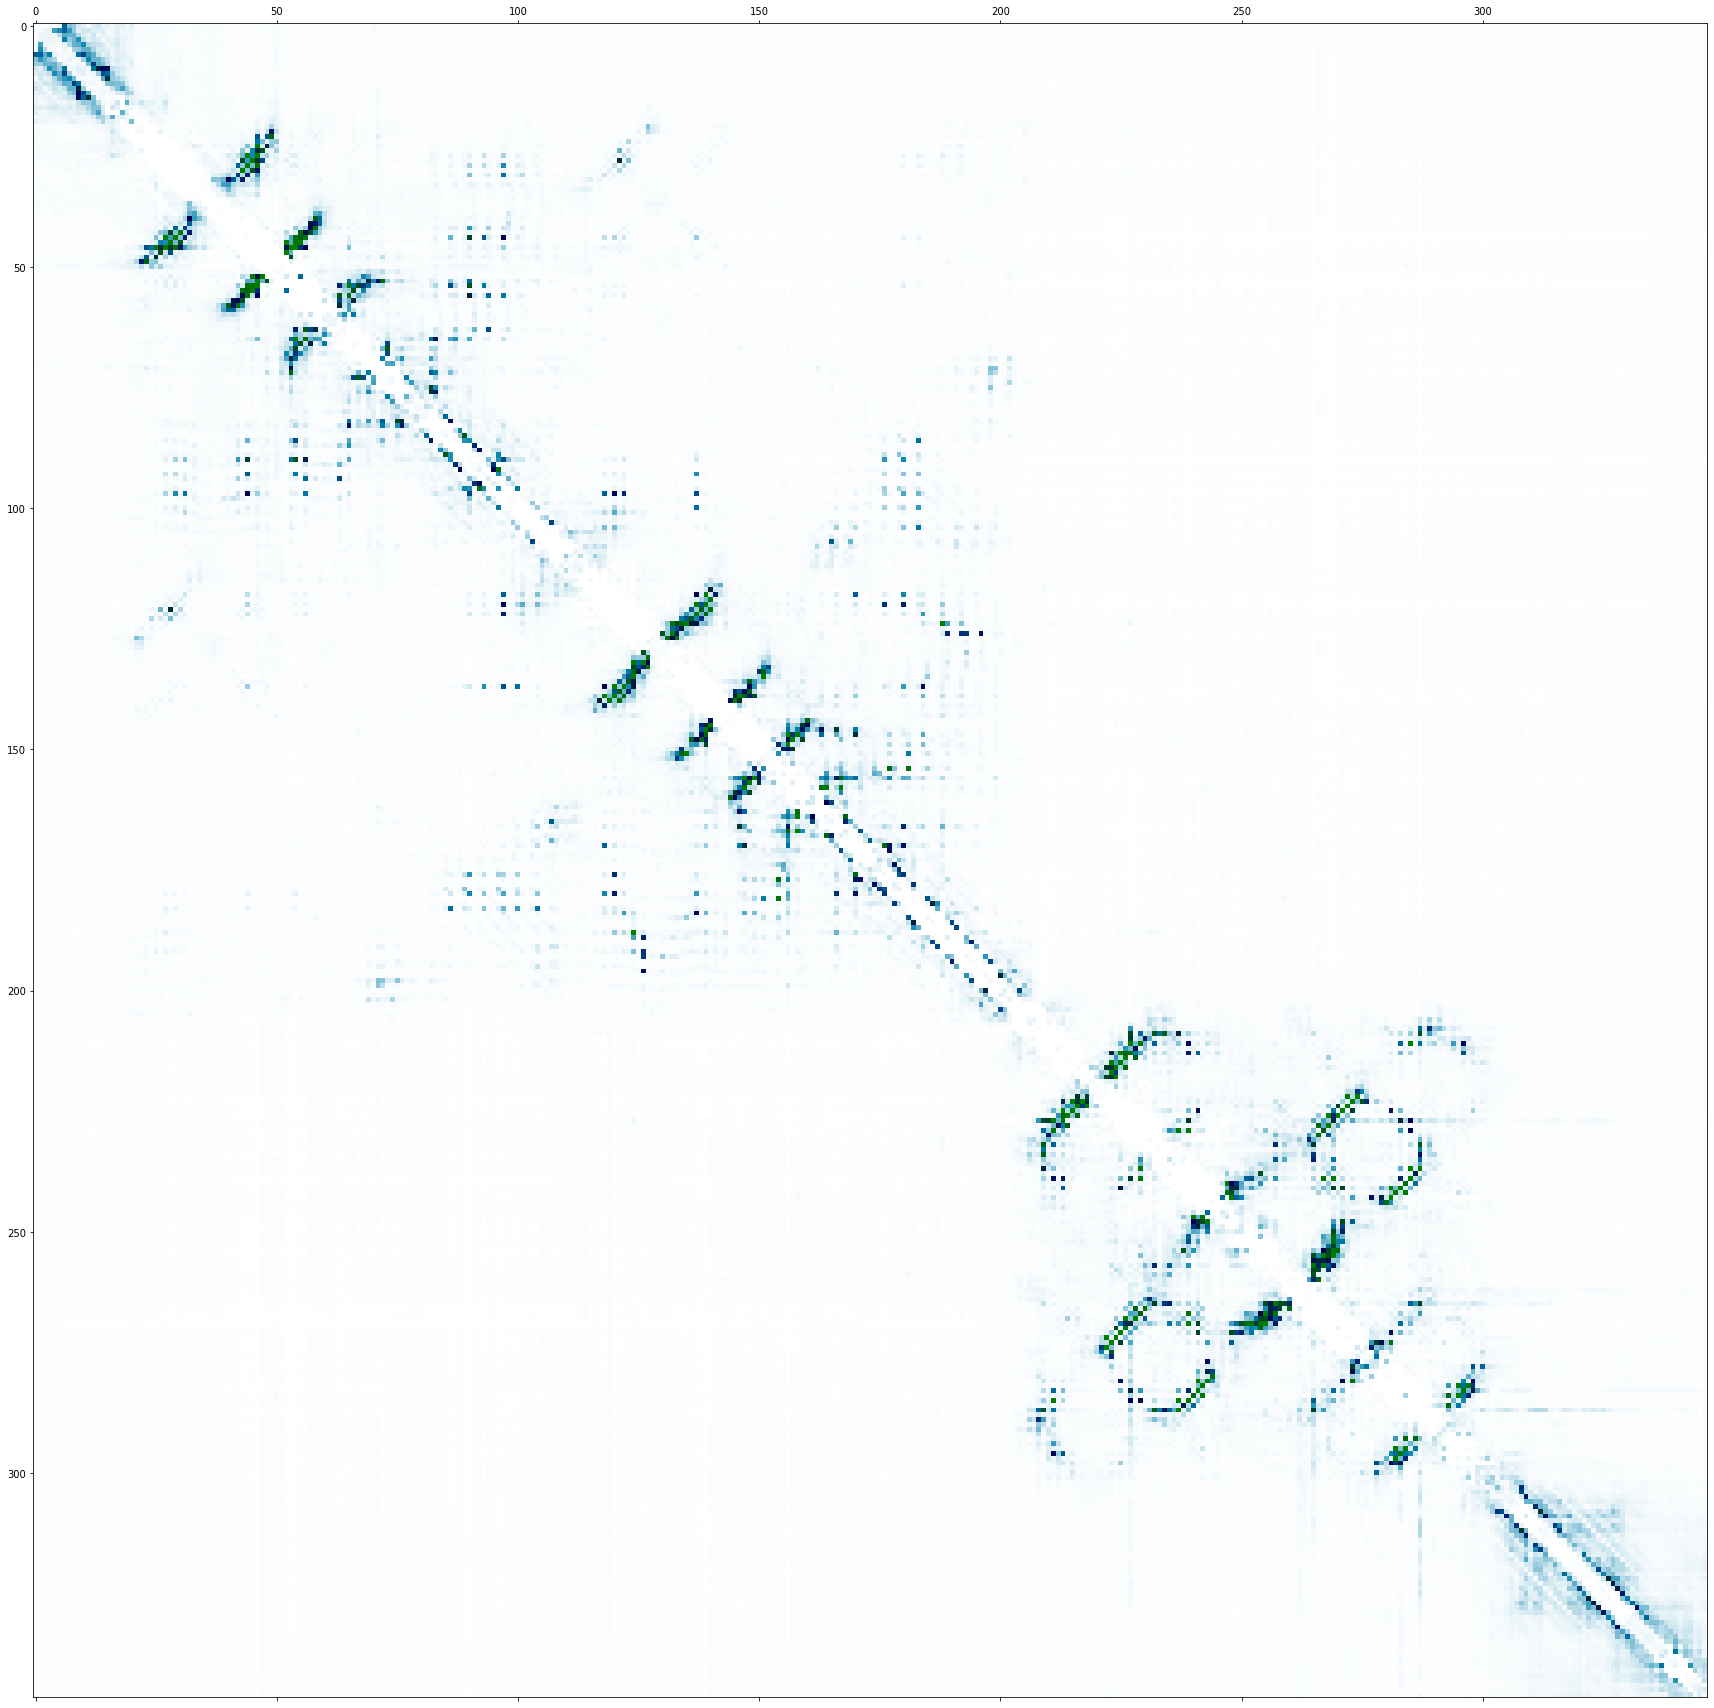

In [5]:
# One protein

seq = 'MEPSLLSLFVLGVVALTETRAGSHSLRYFDTAMSRPELGDSQFISVGYVDDQQFVRFDSSSESPRMEPRAAWMDKVDQEDPNYWEGQTQISRSNAQITRVGLETIRGYYNQSRGGLHTYQTMIGCEVHPDGSFRKGFWQHAYDGHDYIALDRETLTWTAADPGAENTKRKWEAERSIAERYKAYLEEECVQWLKKYLQMGKDVLLRTEPSSARVSRHSGPDGEVSLRCRAQGFYPAEISLTWLRDGEEQLQDTEFIETRPGGDGTFQKWAAVAMAPGQEDRYSCRVQHEALAQPLSLRWEPEASSLWVIVGVTAGVLVLVTAVVAGAVILRRRNSGGKGGAYVPGAA'

seq_tuple = [(1, seq)]
batch_labels, batch_strs, batch_tokens = batch_converter(seq_tuple)

with torch.no_grad():
    esm2_predictions = esm_transformer.predict_contacts(batch_tokens)[0].cpu()

plt.figure(figsize=(30,30))
plt.matshow(esm2_predictions.numpy(),fignum=1,cmap='ocean_r')
plt.show()

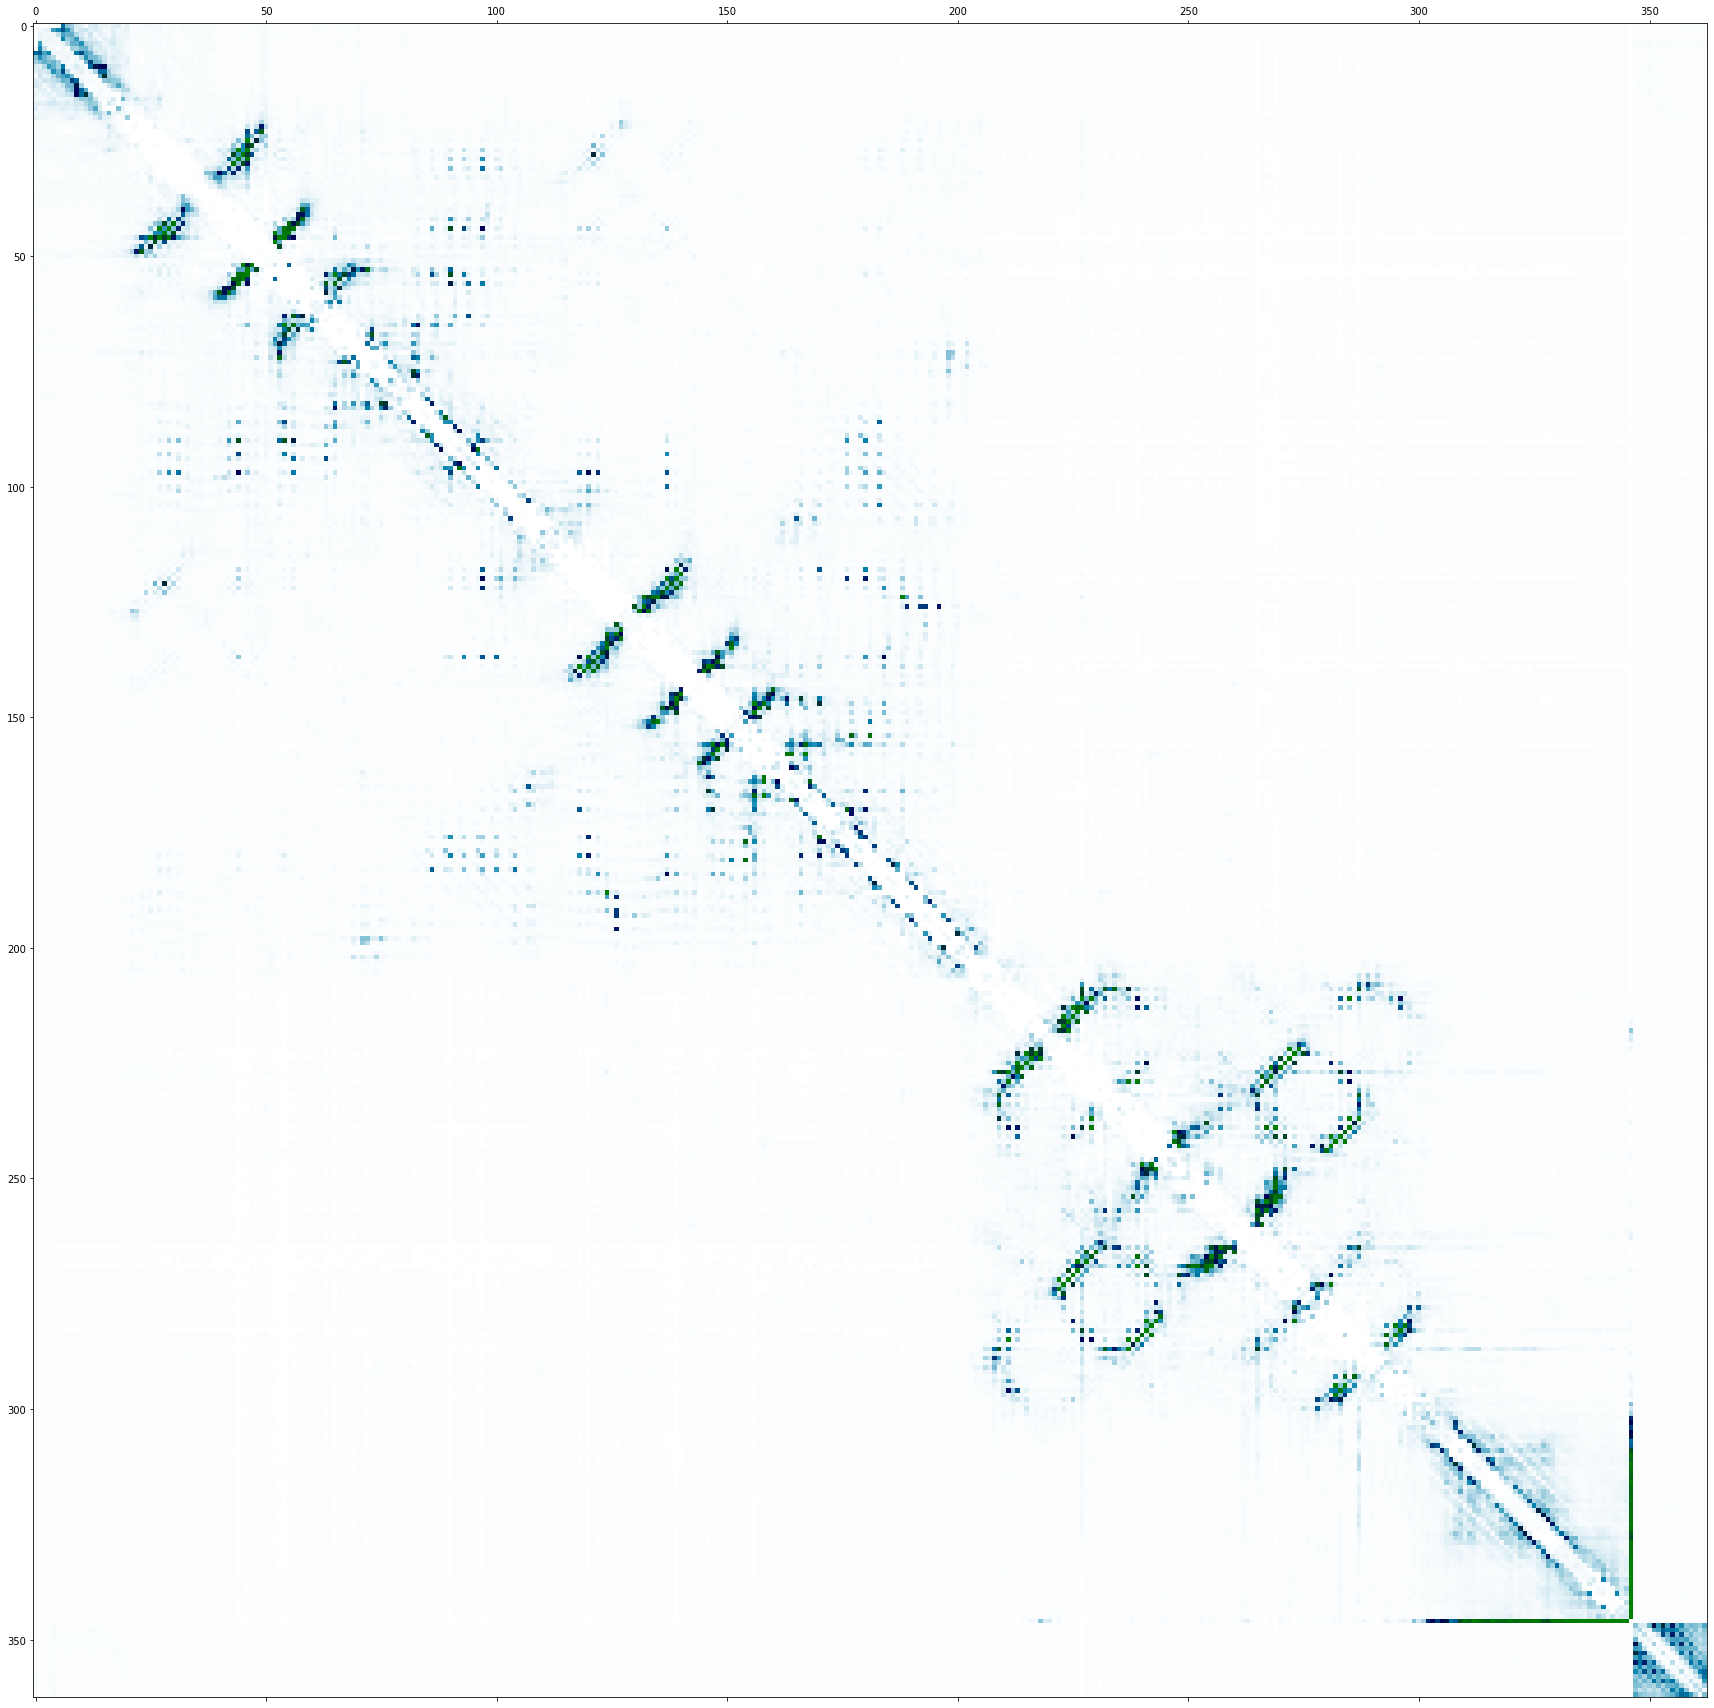

In [6]:
# Two protein

seq1 = 'MEPSLLSLFVLGVVALTETRAGSHSLRYFDTAMSRPELGDSQFISVGYVDDQQFVRFDSSSESPRMEPRAAWMDKVDQEDPNYWEGQTQISRSNAQITRVGLETIRGYYNQSRGGLHTYQTMIGCEVHPDGSFRKGFWQHAYDGHDYIALDRETLTWTAADPGAENTKRKWEAERSIAERYKAYLEEECVQWLKKYLQMGKDVLLRTEPSSARVSRHSGPDGEVSLRCRAQGFYPAEISLTWLRDGEEQLQDTEFIETRPGGDGTFQKWAAVAMAPGQEDRYSCRVQHEALAQPLSLRWEPEASSLWVIVGVTAGVLVLVTAVVAGAVILRRRNSGGKGGAYVPGAA'
seq = seq1 + 'GSGSGSGSGSGSGSGS'
seq_tuple = [(1, seq)]
batch_labels, batch_strs, batch_tokens = batch_converter(seq_tuple)

with torch.no_grad():
    esm2_predictions_gap = esm_transformer.predict_contacts(batch_tokens, gap_info_list = [[len(seq1), 1000]])[0].cpu()

plt.figure(figsize=(30,30))
plt.matshow(esm2_predictions_gap.numpy(),fignum=1,cmap='ocean_r')
plt.show()

In [16]:
for i in range(len(esm2_predictions_gap2)):
    print(esm2_predictions_gap2[i][i])

tensor(0.3697)
tensor(0.5999)
tensor(0.3143)
tensor(0.3862)
tensor(0.2890)
tensor(0.3555)
tensor(0.1826)
tensor(0.2894)
tensor(0.6054)
tensor(0.2310)
tensor(0.6287)
tensor(0.1886)
tensor(0.4300)
tensor(0.5490)
tensor(0.4548)
tensor(0.4086)
tensor(0.4126)
tensor(0.3639)
tensor(0.7344)
tensor(0.2318)
tensor(0.1665)
tensor(0.8586)
tensor(0.8902)
tensor(0.6860)
tensor(0.9165)
tensor(0.3608)
tensor(0.2773)
tensor(0.5582)
tensor(0.4487)
tensor(0.0993)
tensor(0.1743)
tensor(0.0761)
tensor(0.1124)
tensor(0.2764)
tensor(0.1359)
tensor(0.1084)
tensor(0.4266)
tensor(0.1900)
tensor(0.5260)
tensor(0.4747)
tensor(0.6963)
tensor(0.2606)
tensor(0.1463)
tensor(0.2018)
tensor(0.5849)
tensor(0.3664)
tensor(0.0312)
tensor(0.1478)
tensor(0.6668)
tensor(0.3275)
tensor(0.6217)
tensor(0.1487)
tensor(0.2075)
tensor(0.0513)
tensor(0.0563)
tensor(0.0729)
tensor(0.0505)
tensor(0.1793)
tensor(0.0798)
tensor(0.0113)
tensor(0.1437)
tensor(0.2001)
tensor(0.0546)
tensor(0.0467)
tensor(0.1239)
tensor(0.0260)
tensor(0.1

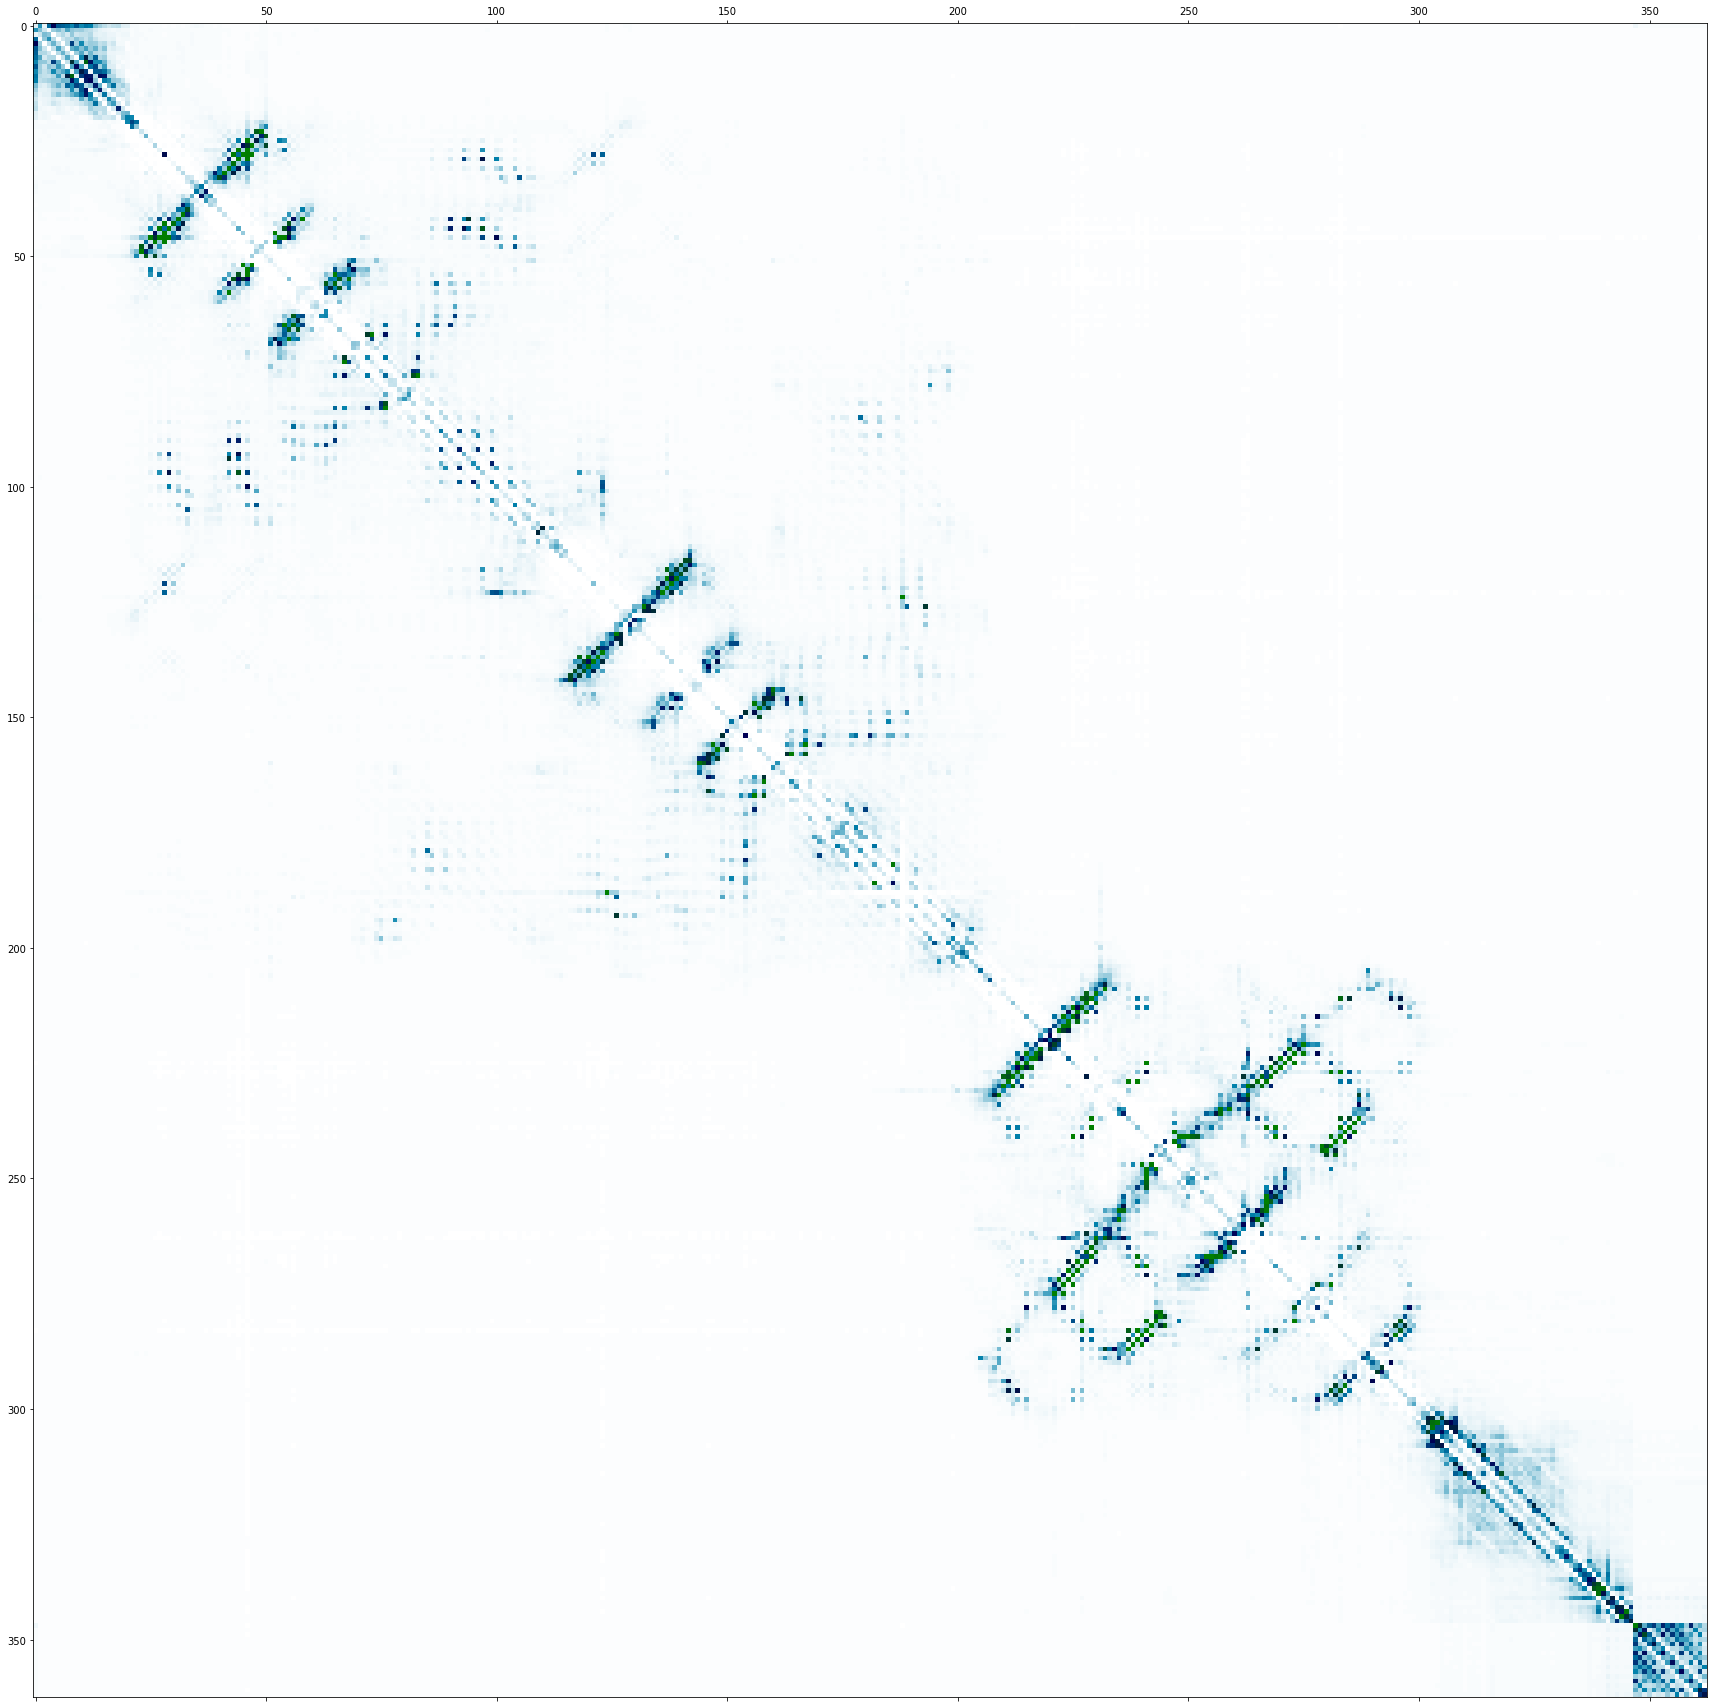

In [7]:
# Two protein, small gap
del esm_transformer 
esm_transformer, esm2_alphabet = esm.pretrained.esm2_t33_650M_UR50D()

with torch.no_grad():
    esm2_predictions_gap2 = esm_transformer.predict_contacts(batch_tokens, gap_info_list = [[len(seq1), 20]])[0].cpu()

plt.figure(figsize=(30,30))
plt.matshow(esm2_predictions_gap2.numpy(),fignum=1,cmap='ocean_r')
plt.show()

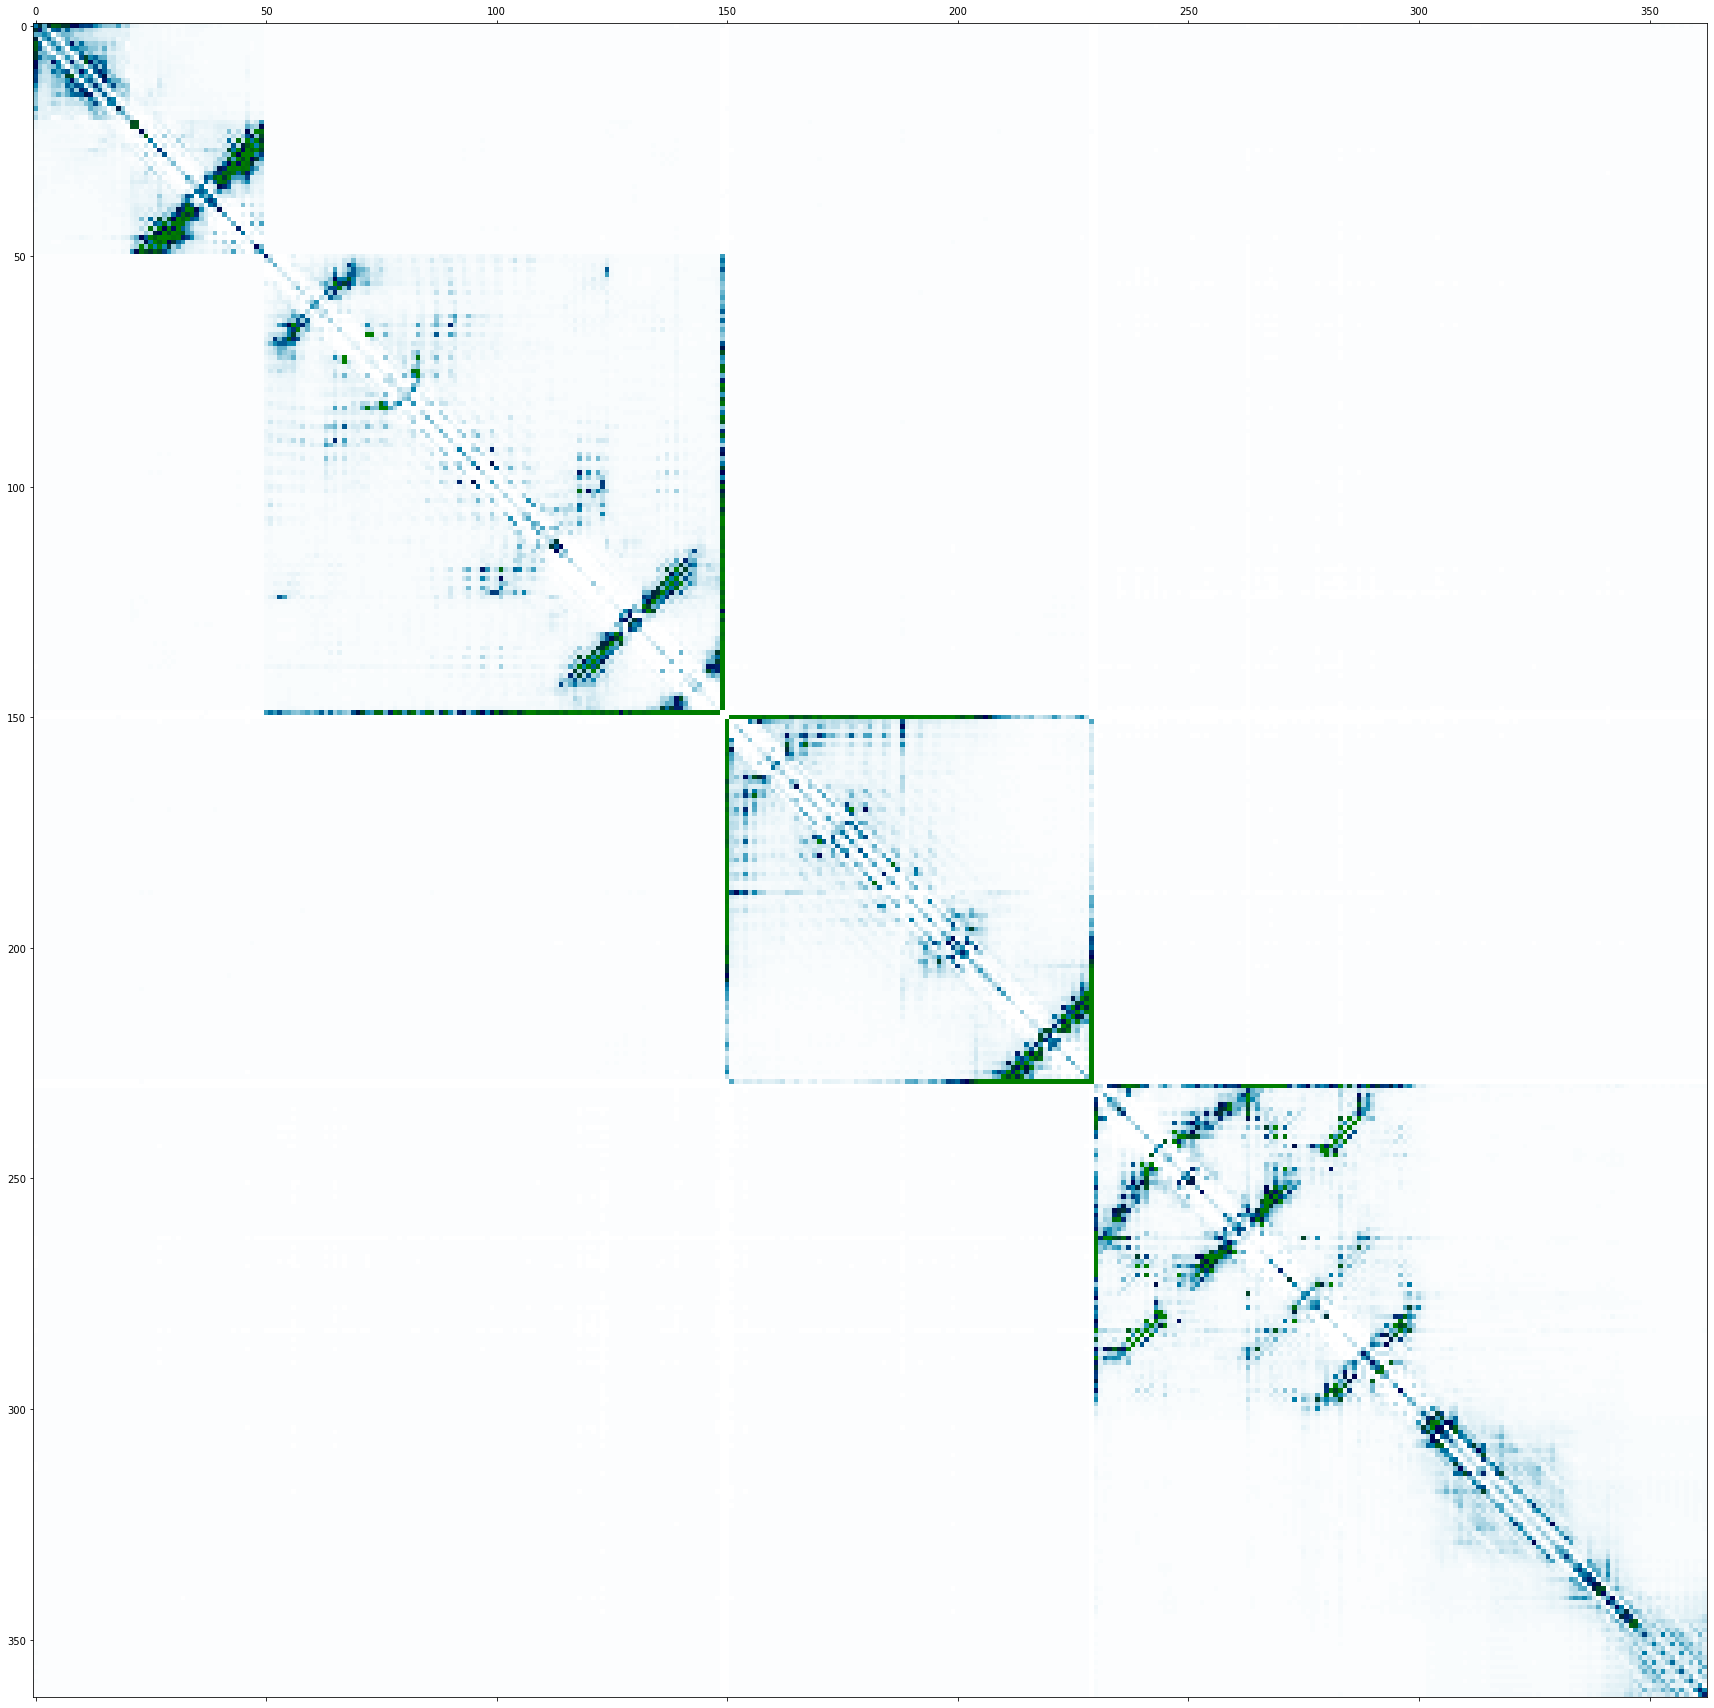

In [8]:
# Multiple gaps
del esm_transformer 
esm_transformer, esm2_alphabet = esm.pretrained.esm2_t33_650M_UR50D()

with torch.no_grad():
    esm2_predictions_gap2 = esm_transformer.predict_contacts(batch_tokens, gap_info_list = [[50, 200],[150,1000],[230,500]])[0].cpu()

plt.figure(figsize=(30,30))
plt.matshow(esm2_predictions_gap2.numpy(),fignum=1,cmap='ocean_r')
plt.show()

In [11]:
# Compare logits and rep layer

#one protein
seq = 'MEPSLLSLFVLGVVALTETRAGSHSLRYFDTAMSRPELGDSQFISVGYVDDQQFVRFDSSSESPRMEPRAAWMDKVDQEDPNYWEGQTQISRSNAQITRVGLETIRGYYNQSRGGLHTYQTMIGCEVHPDGSFRKGFWQHAYDGHDYIALDRETLTWTAADPGAENTKRKWEAERSIAERYKAYLEEECVQWLKKYLQMGKDVLLRTEPSSARVSRHSGPDGEVSLRCRAQGFYPAEISLTWLRDGEEQLQDTEFIETRPGGDGTFQKWAAVAMAPGQEDRYSCRVQHEALAQPLSLRWEPEASSLWVIVGVTAGVLVLVTAVVAGAVILRRRNSGGKGGAYVPGAA'
seq_tuple = [(1, seq)]
batch_labels, batch_strs, batch_tokens = batch_converter(seq_tuple)

with torch.no_grad():
    outputs = esm_transformer(batch_tokens, gap_info_list = [], repr_layers=[33])
    
seq1_layer = outputs['representations'][33].numpy()
seq1_logits = outputs['logits'].numpy()

#one protein + peptide with gap
seq1 = 'MEPSLLSLFVLGVVALTETRAGSHSLRYFDTAMSRPELGDSQFISVGYVDDQQFVRFDSSSESPRMEPRAAWMDKVDQEDPNYWEGQTQISRSNAQITRVGLETIRGYYNQSRGGLHTYQTMIGCEVHPDGSFRKGFWQHAYDGHDYIALDRETLTWTAADPGAENTKRKWEAERSIAERYKAYLEEECVQWLKKYLQMGKDVLLRTEPSSARVSRHSGPDGEVSLRCRAQGFYPAEISLTWLRDGEEQLQDTEFIETRPGGDGTFQKWAAVAMAPGQEDRYSCRVQHEALAQPLSLRWEPEASSLWVIVGVTAGVLVLVTAVVAGAVILRRRNSGGKGGAYVPGAA'
seq = seq1 + 'GSGSGSGSGSGSGSGS'
seq_tuple = [(1, seq)]
batch_labels, batch_strs, batch_tokens = batch_converter(seq_tuple)

with torch.no_grad():
    outputs = esm_transformer(batch_tokens, gap_info_list = [[len(seq1), 200]], repr_layers=[33])
    
gap_layer = outputs['representations'][33].numpy()
gap_logits = outputs['logits'].numpy()